# Мартьянова Александра Евгеньевна, курс «Data Science», ВКР

# Часть 2. Модели Data Science

### Загрузка библиотек

In [1]:
# Загрузка разных библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

### 1. Подготовка и предобработка данных

Исходный датасет

In [2]:
# Загрузка в объект DataFrame() файла X_bp.xlsx, метод  read_excel
x_bp = pd.read_excel('X_bp.xlsx', index_col = 0)
x_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [3]:
# Определение количества строк и столбцов объекта, метод shape
x_bp.shape

(1023, 10)

In [4]:
# Вывод сведений об объекте DataFrame(), метод info()
x_bp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [5]:
# Загрузка в объект DataFrame() файла X_nup.xlsx, метод  read_excel
x_nup = pd.read_excel('X_nup.xlsx', index_col = 0)
x_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0
3.0,0.0,5.0,47.0
4.0,0.0,5.0,57.0


In [6]:
# Определение количества строк и столбцов объекта, метод shape
x_nup.shape

(1040, 3)

In [7]:
# Вывод сведений об объекте DataFrame(), метод info()
x_nup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


In [8]:
# Соединение объектов DataFrame(), метод merge, объединение по индексу, тип объединения INNER
df = x_bp.merge(x_nup, how = 'inner', left_index = True, right_index = True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [9]:
# Вывод сведений об объекте DataFrame(), метод info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

Вывод: соединение произведено по индексам, и часть данных была отброшена при соединении датасетов в общий новый датасет.

Тип данных во всех колонках - float64.

In [10]:
# Изменение типа данных индекса, метод astype('int')
df.index = df.index.astype('int')
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


Вывод: индексы - стали целые числа

In [11]:
# Проверка наличия пропусков типа NULL и NaN в объекте DataFrame(), методы isnull(), isna() и sum()
print(df.isnull().sum())
print()
print(df.isna().sum())

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град  

Вывод: пропуски в датасете отсутствуют

In [12]:
# Проверка наличия дубликатов в объекте DataFrame(), методы duplicated() и sum()
df.duplicated().sum()

0

Вывод: дубликаты в датасете отсутствуют

ПРЕДВАРИТЕЛЬНОЕ ЗАКЛЮЧЕНИЕ ПО ДАТАСЕТУ: датасет качественный: пропуски и дубликаты в датасете отсутствуют

In [13]:
# Проверка количества уникальных значений в каждом столбце датасета df, метод nunique()
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Вывод: категориальныц параметр 'Угол нашивки, град' имеет всего два уровня, может рассматриваться как порядковый и для дальнейшей обработки подвергается ранжированию

In [14]:
# Определение уникальных значений в столбце 'Угол нашивки, град', метод unique()
df['Угол нашивки, град'].unique()

array([ 0., 90.])

In [15]:
# Подсчет количества строк по уникальным значениям столбца 'Угол нашивки, град', метод count()
df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count()

520

In [16]:
print('count, 0 degree : ', df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count())
print('count, 90 degree : ', df['Угол нашивки, град'][df['Угол нашивки, град'] == 90.0].count())
print('count, 90 degree, проверка : ', df.shape - df['Угол нашивки, град'][df['Угол нашивки, град'] == 0.0].count())

count, 0 degree :  520
count, 90 degree :  503
count, 90 degree, проверка :  [ 503 -507]


In [17]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df.dtypes['Угол нашивки, град']

dtype('float64')

In [18]:
# Ранжирование переменной 'Угол нашивки, град' и изменение типа данных, метод astype(int)
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [19]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df.dtypes['Угол нашивки, град']

dtype('int32')

In [20]:
# Вывод первых пяти строк датасета df
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [21]:
# Вывод сведений о названиях столбцов датасета df, метод columns
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [22]:
# Вывод сведений об объекте DataFrame(), метод info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int32  
 11  Шаг нашивки      

In [23]:
# Описательная статистика датасета df, метод describe()
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,0.491691,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,0.500175,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,1.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,1.000000,14.440522,103.988901


###### Построение графиков рассеяния и распределения параметров, а также графиков "ящики с усами"

In [24]:
# Вывод парных графиков рассеяния датасета df, метод pairplot библиотеки seaborn
#sns.pairplot(df, height=3)

Вывод парные графики рассеяния не показывают какой-либо зависимости между параметрами

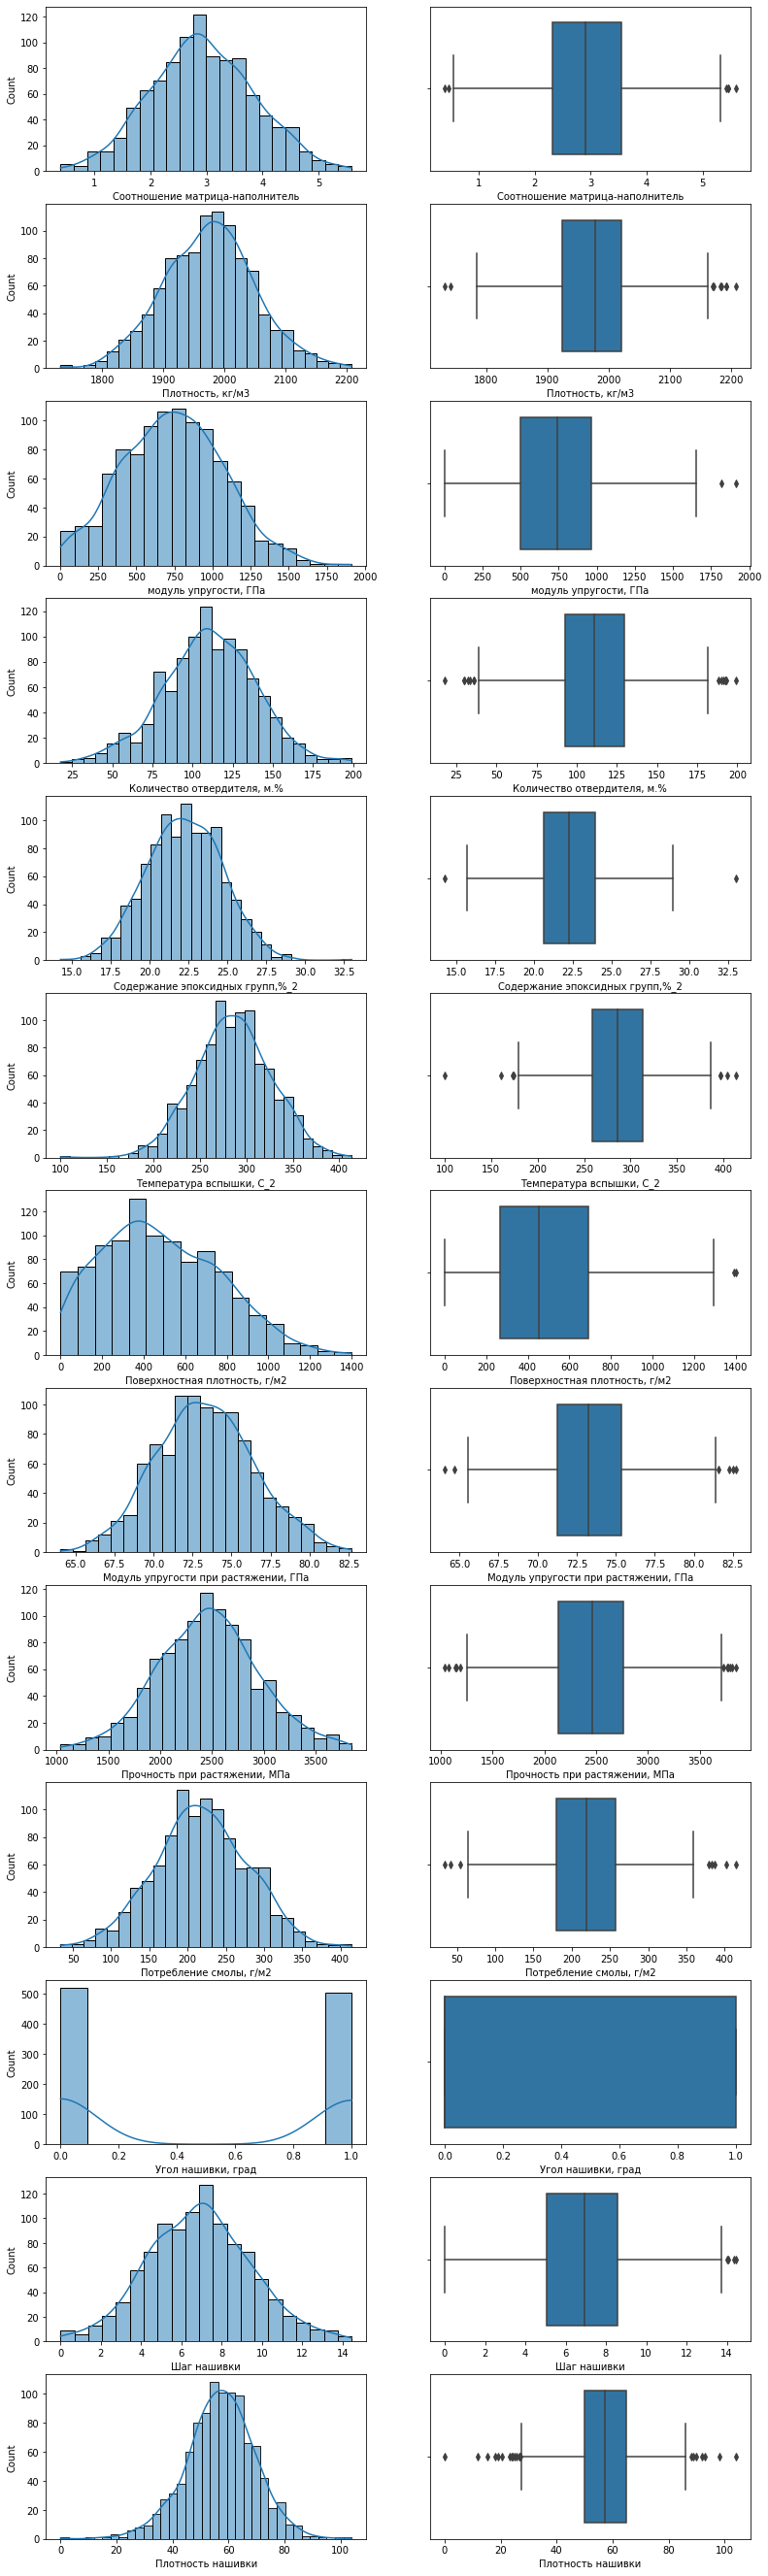

In [25]:
# Построение графиков распределения параметров и "ящики с усами", метод subplots библиотеки seaborn
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Вывод: на первый взгляд, судя по графикам распределения параметров, распределения параметров, кроме 'модуль упругости, ГПа', 'Поверхностная плотность, г/м2', 'Угол нашивки' близки к нормальным. Судя по графикам рассеяния и графикам "ящики с усами", имеются выбросы.

Требуется очистить данные от выбросов и выполнить нормализацию данных

###### Очистка данных от выбросов: 

Квартильная очистка датасета df от выбросов:

In [26]:
for col in df.columns:
    q75,q25 = np.percentile(df.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[col] < min,col] = np.nan
    df.loc[df[col] > max,col] = np.nan

In [27]:
# Проверка наличия пропусков типа NULL и NaN в объекте DataFrame(), методы isnull(), isna() и sum()
print(df.isnull().sum())
print()
print(df.isna().sum())

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                 

In [28]:
#Удаление выбросов и изменение типа данных, метод astype('int')
df = df.dropna(axis=0)
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074


In [29]:
# Проверка наличия пропусков типа NULL в объекте DataFrame(), методы isnull() и sum()
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Вывод: датасет df подготовлен

### 2. Нормализация значений параметров с помощью метода MinMaxScaler

In [30]:
# Загрузка MinMaxScaler из библиотеки sklearn
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Применение  MinMaxScaler для нормализации датасета df
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [32]:
# Описательная статистика нормализованного датасета df_norm
df_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Попарные графики рассеяния после нормализации
#sns.pairplot(df_norm, height=3)

In [34]:
# Параметр 'Угол нашивки, град' - категориальный, поэтому его следует исключить
# при построении матрицы корреляции по критерию Пирсона
df_dnorm=df_norm[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]
df_dnorm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
1,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.162230,0.280303,0.712590,0.529221,0.289334,0.557156
3,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.162230,0.280303,0.712590,0.529221,0.362355,0.335840
4,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.362355,0.506083
5,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.362355,0.557156
6,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.362355,0.727399
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361662,0.444480,0.552781,0.337550,0.333908,0.703458,0.161609,0.475147,0.463043,0.207613,0.660014,0.336177
1019,0.607674,0.704373,0.268550,0.749605,0.294428,0.362087,0.271207,0.464422,0.452087,0.182974,0.768759,0.450768
1020,0.573391,0.498274,0.251612,0.501991,0.623085,0.334063,0.572959,0.578740,0.575296,0.585446,0.301102,0.687046
1021,0.662497,0.748688,0.448724,0.717585,0.267818,0.466417,0.496511,0.535142,0.334513,0.451779,0.458245,0.527552


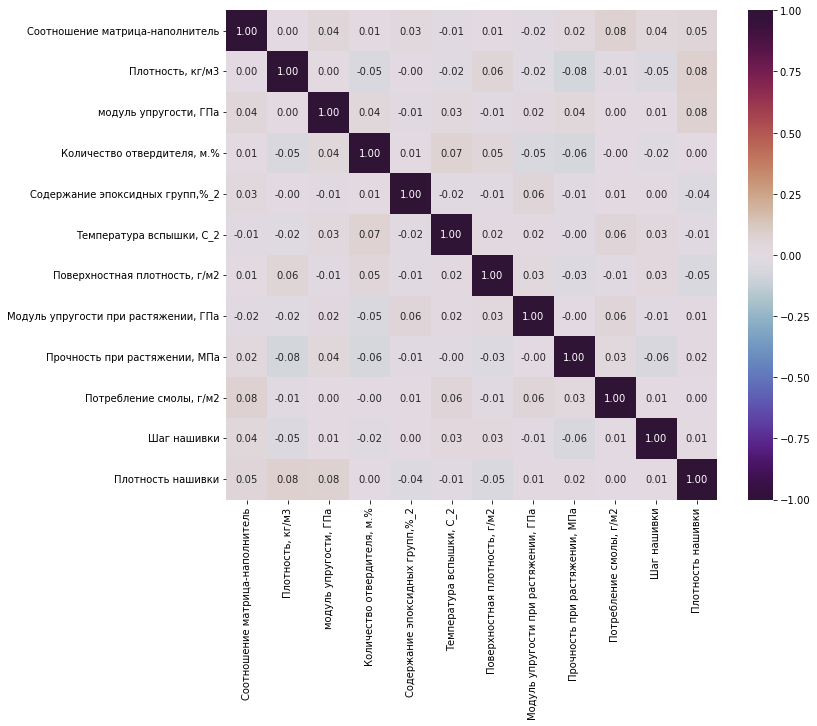

In [35]:
# Матрица корреляции по Пирсону после нормализации
corr = df_dnorm.corr() # Пирсон по умолчанию
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

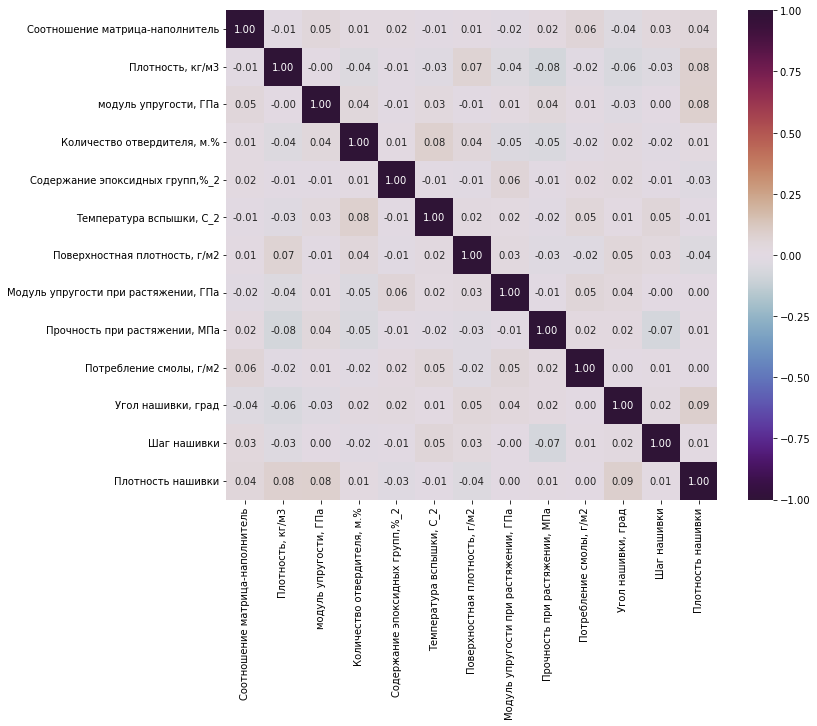

In [36]:
# Матрица корреляции по Спирмену после нормализации
corr = df_norm.corr(method = 'spearman') # критерий Спирмена
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Вывод: судя по матрицам корреляции, построенной на основании корреляции по Пирсону для количественных данных и Спирмена для количественных и категориальных данных, коэффициенты корреляции
после очистки от выбросов и нормализации параметров мало изменились.

In [37]:
# Переименование и вывод датасета df_norm
df = df_norm
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,0.274768,0.651097,0.447061,0.079153,0.607435,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.289334,0.557156
3,0.274768,0.651097,0.447061,0.630983,0.418887,0.583596,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.335840
4,0.466552,0.651097,0.455721,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.506083
5,0.465836,0.571539,0.452685,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.557156
6,0.424236,0.332865,0.488508,0.511257,0.495653,0.509164,0.162230,0.280303,0.712590,0.529221,0.0,0.362355,0.727399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361662,0.444480,0.552781,0.337550,0.333908,0.703458,0.161609,0.475147,0.463043,0.207613,1.0,0.660014,0.336177
1019,0.607674,0.704373,0.268550,0.749605,0.294428,0.362087,0.271207,0.464422,0.452087,0.182974,1.0,0.768759,0.450768
1020,0.573391,0.498274,0.251612,0.501991,0.623085,0.334063,0.572959,0.578740,0.575296,0.585446,1.0,0.301102,0.687046
1021,0.662497,0.748688,0.448724,0.717585,0.267818,0.466417,0.496511,0.535142,0.334513,0.451779,1.0,0.458245,0.527552


Вывод: датасет нормализован

### 3. Модели для прогноза модуля упругости при растяжении и прочности при растяжении

In [38]:
# Загрузка модулей библиотеки sklearn для регрессоров и других библиотек
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

###### Разбиение данных на обучающую и тестовую выборки

In [39]:
# Назначение переменных для создания моделей
x_upr = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df[['Модуль упругости при растяжении, ГПа']]
y_pr = df[['Прочность при растяжении, МПа']]
# Разбиение данных на обучающую и тестовую выборки
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=5)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=5)

###### Метод К ближайших соседей

In [40]:
# Регрессор KNeighborsRegressor() для расчета методом K-ближайших соседей,
# используются унифицированные веса и настройки алгоритма по умолчанию
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
# используется поиск по сетке GridSearchCV для upr
GSCV_knr_upr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_upr.fit(X_train_upr, y_train_upr)
GSCV_knr_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 59, 'weights': 'uniform'}

In [41]:
# Поиск по лучшей модели и вывод результатов для upr
knr_upr = GSCV_knr_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {knr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score KNR для модуля упругости при растяжении: -0.005


In [42]:
# Создание объекта pandas DataFrame()
models = pd.DataFrame()

In [43]:
# Запись результатов расчета в DataFrame()
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, knr_upr.predict(X_test_upr)), 
   'R2 score': knr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [44]:
# Соединение объектов DataFrame()
models = pd.concat([models, knr_upr_result])

In [45]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.160652,-0.005


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [46]:
# Используется поиск по сетке GridSearchCV для pr
GSCV_knr_pr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_pr.fit(X_train_pr, y_train_pr)
GSCV_knr_pr.best_params_

{'algorithm': 'auto', 'n_neighbors': 237, 'weights': 'uniform'}

In [47]:
# Поиск по лучшей модели и вывод результатов для pr
knr_pr = GSCV_knr_pr.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {knr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score KNR для прочности при растяжении: -0.001


In [48]:
# Запись результатов расчета в DataFrame()
knr_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, knr_pr.predict(X_test_pr)), 
   'R2 score': knr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [49]:
# Соединение объектов DataFrame()
models = pd.concat([models, knr_pr_result])

In [50]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.160652,-0.005
Прочность при растяжении,KNeighborsRegressor_pr,0.152176,-0.001


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Стохастический градиентный спуск

In [51]:
# Регрессор SGDRegressor() для расчета методом стохастического градиентного спуска,
# используются настройки алгоритма по умолчанию
sgd = SGDRegressor()
sgd_params = {'loss' : ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
          'penalty' : ['elasticnet', 'l2', 'l1'],
          'alpha' : [0.0001, 0.001, 0.01, 0.0002, 0.002],
          'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
          'epsilon' : [0.1, 0.01, 0.2, 0.02]
          }
# используется поиск по сетке GridSearchCV для upr
GSCV_sgd_upr = GridSearchCV(sgd, sgd_params, cv=10, verbose=0)
GSCV_sgd_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_sgd_upr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

{'alpha': 0.001,
 'epsilon': 0.02,
 'learning_rate': 'optimal',
 'loss': 'huber',
 'penalty': 'l1'}

In [52]:
# Поиск по лучшей модели и вывод результатов для upr
sgd_upr = GSCV_sgd_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_upr.score(X_test_upr, y_test_upr).round(3)}')
print(mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)))

R2-score KNR для модуля упругости при растяжении: -0.012
0.15820262228389123


In [53]:
# Запись результатов расчета в DataFrame()
sgd_upr_result = pd.DataFrame({
   'Model': 'SGDRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)), 
   'R2 score': sgd_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [54]:
# Соединение объектов DataFrame()
models = pd.concat([models, sgd_upr_result])

In [55]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.160652,-0.005
Прочность при растяжении,KNeighborsRegressor_pr,0.152176,-0.001
Модуль упругости при растяжении,SGDRegressor_upr,0.158203,-0.012


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [56]:
# Используется поиск по сетке GridSearchCV для pr
GSCV_sgd_pr = GridSearchCV(sgd, sgd_params, cv=10)
GSCV_sgd_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_sgd_pr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

{'alpha': 0.001,
 'epsilon': 0.01,
 'learning_rate': 'optimal',
 'loss': 'huber',
 'penalty': 'elasticnet'}

In [57]:
# Поиск по лучшей модели и вывод результатов для pr
sgd_pr = GSCV_sgd_pr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_pr.score(X_test_pr, y_test_pr).round(3)}')
print(mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)))

R2-score KNR для модуля упругости при растяжении: -0.0
0.1520497132330646


In [58]:
# Запись результатов расчета в DataFrame()
sgd_pr_result = pd.DataFrame({
   'Model': 'SGDRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)), 
   'R2 score': sgd_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [59]:
# Соединение объектов DataFrame()
models = pd.concat([models, sgd_pr_result])

In [60]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.160652,-0.005
Прочность при растяжении,KNeighborsRegressor_pr,0.152176,-0.001
Модуль упругости при растяжении,SGDRegressor_upr,0.158203,-0.012
Прочность при растяжении,SGDRegressor_pr,0.152050,-0.000


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Линейная регрессия

In [61]:
# Регрессор LinearRegression() для расчета методом линейной регрессии,
# используются настройки алгоритма по умолчанию
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
# используется поиск по сетке GridSearchCV для upr
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [62]:
# Поиск по лучшей модели и вывод результатов для upr
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score LR для модуля упругости при растяжении: -0.021


In [63]:
# Запись результатов расчета в DataFrame()
lr_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [64]:
# Соединение объектов DataFrame()
models = pd.concat([models, lr_upr_result])

In [65]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.160652,-0.005
Прочность при растяжении,KNeighborsRegressor_pr,0.152176,-0.001
Модуль упругости при растяжении,SGDRegressor_upr,0.158203,-0.012
Прочность при растяжении,SGDRegressor_pr,0.152050,-0.000
Модуль упругости при растяжении,LinearRegression_upr,0.160518,-0.021


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [66]:
# используется поиск по сетке GridSearchCV для pr
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(X_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [67]:
# Поиск по лучшей модели и вывод результатов для pr
lr_pr = GSCV_lr_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score LR для прочности при растяжении: -0.006


In [68]:
# Запись результатов расчета в DataFrame()
lr_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr', 
   'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(X_test_pr)), 
   'R2 score': lr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [69]:
# Соединение объектов DataFrame()
models = pd.concat([models, lr_pr_result])

In [70]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.160652,-0.005
Прочность при растяжении,KNeighborsRegressor_pr,0.152176,-0.001
Модуль упругости при растяжении,SGDRegressor_upr,0.158203,-0.012
Прочность при растяжении,SGDRegressor_pr,0.152050,-0.000
Модуль упругости при растяжении,LinearRegression_upr,0.160518,-0.021
Прочность при растяжении,LinearRegression_pr,0.152218,-0.006


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Случайный лес

In [71]:
# Регрессор RandomForestRegressor() для расчета методом случайного леса
# испальзуются настройки алгоритма по умолчанию
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
# Используется поиск по RandomizedSearchCV для upr
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, np.ravel(y_train_upr))
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 340,
 'min_samples_split': 35,
 'min_samples_leaf': 5,
 'max_depth': 1,
 'criterion': 'poisson',
 'bootstrap': 'True'}

In [72]:
# Поиск по лучшей модели и вывод результатов для upr
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score RFR для модуля упругости при растяжении: -0.02


In [73]:
# Запись результатов расчета в DataFrame()
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [74]:
# Соединение объектов DataFrame()
models = pd.concat([models, rfr_upr_result])

In [75]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.160652,-0.005
Прочность при растяжении,KNeighborsRegressor_pr,0.152176,-0.001
Модуль упругости при растяжении,SGDRegressor_upr,0.158203,-0.012
Прочность при растяжении,SGDRegressor_pr,0.152050,-0.000
Модуль упругости при растяжении,LinearRegression_upr,0.160518,-0.021
Прочность при растяжении,LinearRegression_pr,0.152218,-0.006
Модуль упругости при растяжении,RandomForestRegressor_upr,0.161390,-0.020


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [76]:
# Используется поиск по RandomizedSearchCV() для pr
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(X_train_pr, np.ravel(y_train_pr))
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 140,
 'min_samples_split': 20,
 'min_samples_leaf': 7,
 'max_depth': 1,
 'criterion': 'absolute_error',
 'bootstrap': 'True'}

In [77]:
# Поиск по лучшей модели и вывод результатов для pr
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score RFR для прочности при растяжении: -0.003


In [78]:
# Запись результатов расчета в DataFrame()
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [79]:
# Соединение объектов DataFrame()
models = pd.concat([models, rfr_pr_result])

In [80]:
# Вывод результатов в кросс-таблицу
models 

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.160652,-0.005
Прочность при растяжении,KNeighborsRegressor_pr,0.152176,-0.001
Модуль упругости при растяжении,SGDRegressor_upr,0.158203,-0.012
Прочность при растяжении,SGDRegressor_pr,0.152050,-0.000
Модуль упругости при растяжении,LinearRegression_upr,0.160518,-0.021
Прочность при растяжении,LinearRegression_pr,0.152218,-0.006
Модуль упругости при растяжении,RandomForestRegressor_upr,0.161390,-0.020
Прочность при растяжении,RandomForestRegressor_pr,0.152639,-0.003


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Многослойный перцептрон

In [81]:
# Регрессор MLPRegressor() для расчета с помощью создания многослойного перцептрона
# используются настройки алгоритма
mlpr = MLPRegressor(random_state=2)
mlpr_params = {
    'hidden_layer_sizes' : [(64, 32, 12), (12, 12, 12, 12, 12),
                            (32, 32, 16, 8), (16, 16, 8)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [300],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}
# используется поиск по сетке GridSearchCV для upr
GSCV_mlpr_upr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_mlpr_upr.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (16, 16, 8),
 'learning_rate': 'adaptive',
 'max_iter': 300,
 'solver': 'sgd'}

In [82]:
# Поиск по лучшей модели и вывод результатов для upr
mlpr_upr = GSCV_mlpr_upr.best_estimator_
print(f'R2-score MLPR для модуля упругости при растяжении: {mlpr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score MLPR для модуля упругости при растяжении: -0.001


In [83]:
# Запись результатов расчета в DataFrame()
mlpr_upr_result = pd.DataFrame({
   'Model': 'MLPRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, mlpr_upr.predict(X_test_upr)), 
   'R2 score': mlpr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [84]:
# Соединение объектов DataFrame()
models = pd.concat([models, mlpr_upr_result])

In [85]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.160652,-0.005
Прочность при растяжении,KNeighborsRegressor_pr,0.152176,-0.001
Модуль упругости при растяжении,SGDRegressor_upr,0.158203,-0.012
Прочность при растяжении,SGDRegressor_pr,0.152050,-0.000
Модуль упругости при растяжении,LinearRegression_upr,0.160518,-0.021
Прочность при растяжении,LinearRegression_pr,0.152218,-0.006
Модуль упругости при растяжении,RandomForestRegressor_upr,0.161390,-0.020
Прочность при растяжении,RandomForestRegressor_pr,0.152639,-0.003
Модуль упругости при растяжении,MLPRegressor_upr,0.159163,-0.001


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [86]:
# используется поиск по сетке GridSearchCV для pr
GSCV_mlpr_pr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_mlpr_pr.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (16, 16, 8),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'sgd'}

In [87]:
# Поиск по лучшей модели и вывод результатов для pr
mlpr_pr = GSCV_mlpr_pr.best_estimator_
print(f'R2-score MLPR для прочности при растяжении: {mlpr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score MLPR для прочности при растяжении: -0.0


In [88]:
# Запись результатов расчета в DataFrame()
mlpr_pr_result = pd.DataFrame({
   'Model': 'MLPRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, mlpr_pr.predict(X_test_pr)), 
   'R2 score': mlpr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [89]:
# Соединение объектов DataFrame()
models = pd.concat([models, mlpr_pr_result])

In [90]:
# Вывод результатов в кросс-таблицу
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.160652,-0.005
Прочность при растяжении,KNeighborsRegressor_pr,0.152176,-0.001
Модуль упругости при растяжении,SGDRegressor_upr,0.158203,-0.012
Прочность при растяжении,SGDRegressor_pr,0.152050,-0.000
Модуль упругости при растяжении,LinearRegression_upr,0.160518,-0.021
Прочность при растяжении,LinearRegression_pr,0.152218,-0.006
Модуль упругости при растяжении,RandomForestRegressor_upr,0.161390,-0.020
Прочность при растяжении,RandomForestRegressor_pr,0.152639,-0.003
Модуль упругости при растяжении,MLPRegressor_upr,0.159163,-0.001
Прочность при растяжении,MLPRegressor_pr,0.152000,-0.000


In [91]:
# Сортировка кросс- таблицы и вывод результатов
models_sort = models.sort_values(by=['MAE', 'R2 score'])
models_sort

,Model,MAE,R2 score
Прочность при растяжении,MLPRegressor_pr,0.152000,-0.000
Прочность при растяжении,SGDRegressor_pr,0.152050,-0.000
Прочность при растяжении,KNeighborsRegressor_pr,0.152176,-0.001
Прочность при растяжении,LinearRegression_pr,0.152218,-0.006
Прочность при растяжении,RandomForestRegressor_pr,0.152639,-0.003
Модуль упругости при растяжении,SGDRegressor_upr,0.158203,-0.012
Модуль упругости при растяжении,MLPRegressor_upr,0.159163,-0.001
Модуль упругости при растяжении,LinearRegression_upr,0.160518,-0.021
Модуль упругости при растяжении,KNeighborsRegressor_upr,0.160652,-0.005
Модуль упругости при растяжении,RandomForestRegressor_upr,0.161390,-0.020


Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Графики ошибок моделей

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа')

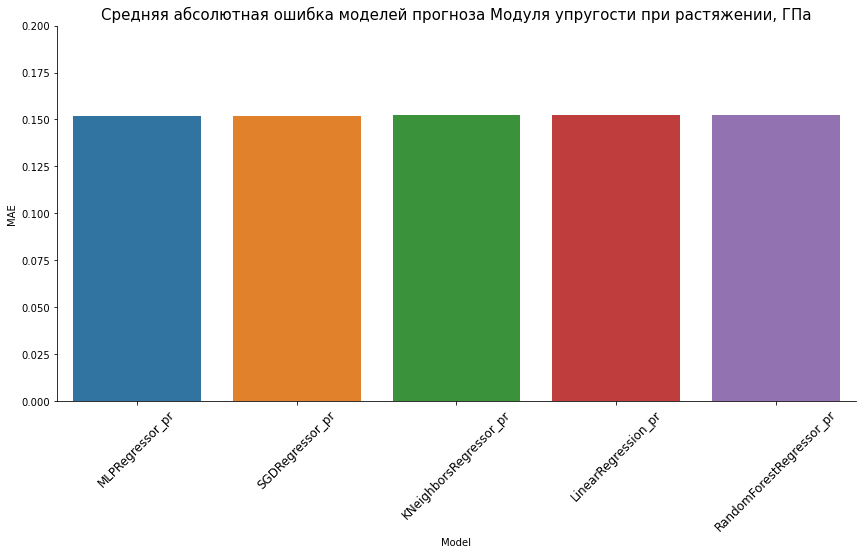

In [92]:
# Создание графика для средней абсолютной ошибки моделей прогноза параметра 'Модуля упругости при растяжении, ГПа'
sns.catplot(data=models_sort[0:5], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=0, ymax=0.2)
plt.xticks(size=12)
plt.xticks(fontsize = 12, rotation = 45)
plt.title('Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа', size=15)

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа')

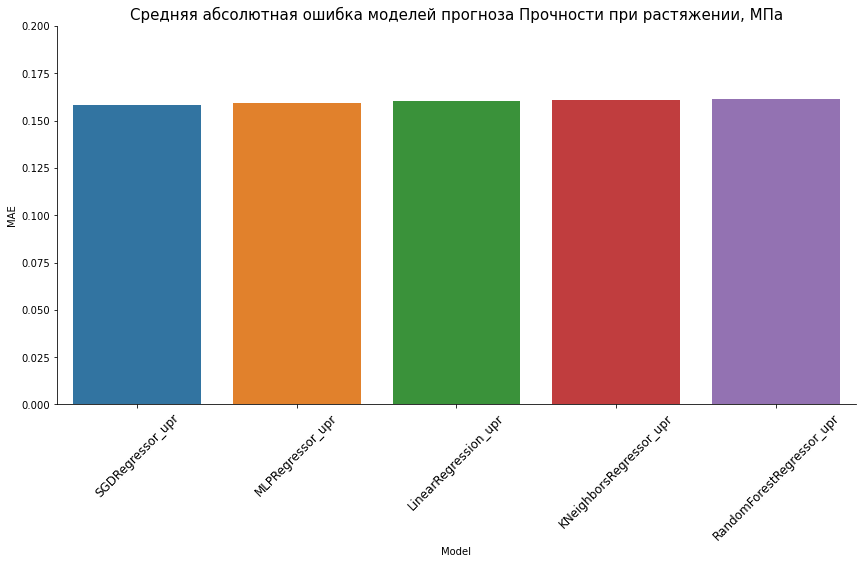

In [93]:
# Создание графика для средней абсолютной ошибки моделей прогноза параметра 'Прочности при растяжении, МПа'
sns.catplot(data=models_sort[5:10], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=0, ymax=0.2)
plt.xticks(size=12)
plt.xticks(fontsize = 12, rotation = 45)
plt.title('Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа', size=15)

Вывод: средние ошибки моделей прогноза примерно одинаковые

###### Построение нейронной сети на Keras

Построение нейронной сети на Keras для предсказания следующих параметров: Модуль упругости при растяжении, Прочность при растяжении, Соотношение матрица-наполнитель.

In [94]:
# Загрузка библиотеки tensorflow
import tensorflow as tf
# Загрузка модуля keras библиотеки tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Вывод версии библиотеки tensorflow
print(tf.__version__)

2.11.0


- Нейронная сеть для прогноза параметра Модуль упругости при растяжении

In [95]:
# Создание слоя, который выполняет нормализацию входных объектов
normalizer = tf.keras.layers.Normalization(axis=-1)

In [96]:
# Получение данных в слой
X_train_upr_norm = normalizer.adapt(np.array(X_train_upr))

In [97]:
# Вид модели - коллекция, стек слоев
model_upr = Sequential(X_train_upr_norm)
# Добавление слоев в модель
model_upr.add(Dense(128))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(1))
model_upr.add(Activation(activation='elu'))

In [98]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_upr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [99]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_upr = model_upr.fit(
    X_train_upr,
    y_train_upr,
    batch_size = 200,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
3/3 [==============================] - 2s 118ms/step - loss: 0.5332 - val_loss: 0.7328
Epoch 2/40
3/3 [==============================] - 0s 15ms/step - loss: 0.3810 - val_loss: 0.6374
Epoch 3/40
3/3 [==============================] - 0s 16ms/step - loss: 0.3303 - val_loss: 0.5360
Epoch 4/40
3/3 [==============================] - 0s 15ms/step - loss: 0.2599 - val_loss: 0.4376
Epoch 5/40
3/3 [==============================] - 0s 15ms/step - loss: 0.2282 - val_loss: 0.4159
Epoch 6/40
3/3 [==============================] - 0s 15ms/step - loss: 0.2151 - val_loss: 0.4079
Epoch 7/40
3/3 [==============================] - 0s 15ms/step - loss: 0.2000 - val_loss: 0.3932
Epoch 8/40
3/3 [==============================] - 0s 16ms/step - loss: 0.1953 - val_loss: 0.3832
Epoch 9/40
3/3 [==============================] - 0s 18ms/step - loss: 0.1720 - val_loss: 0.3780
Epoch 10/40
3/3 [==============================] - 0s 16ms/step - loss: 0.1595 - val_loss: 0.3318
Epoch 11/40
3/3 [===========

In [100]:
# Вывод архитектуры сети для upr
model_upr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0

In [101]:
keras.utils.plot_model(model_upr, show_shapes=True, show_layer_names=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [102]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

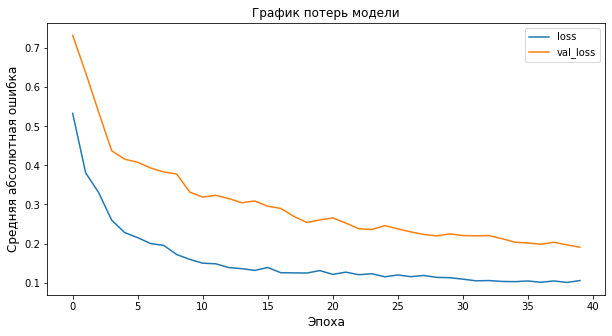

In [103]:
# Построение графика потерь модели
model_loss_plot(history_upr)

9/9 [==============================] - 0s 1ms/step


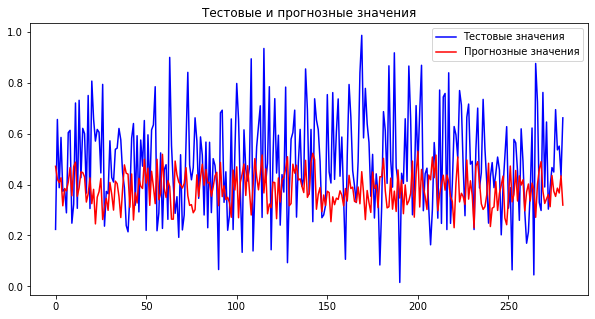

In [104]:
# Построение графика оригинального и прогнозного значения y
pred_upr = model_upr.predict(np.array((X_test_upr)))
original_upr = y_test_upr.values
predicted_upr = pred_upr

actual_and_predicted_plot(original_upr, predicted_upr)

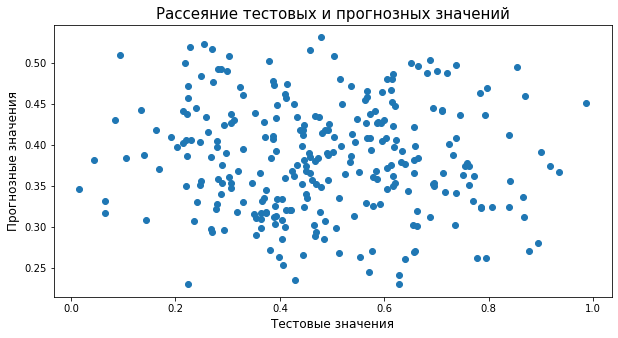

In [105]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_upr, predicted_upr)

In [106]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_upr.evaluate(X_test_upr, y_test_upr, verbose=1)}')

9/9 [==============================] - 0s 1ms/step - loss: 0.1871
Model MAE: 0.18708279728889465


In [107]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_upr-np.mean(y_test_upr)))}')

MAE среднего значения: Модуль упругости при растяжении, ГПа    0.158629
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


- Нейронная сеть для прогноза параметра Прочность при растяжении

In [108]:
# Получение данных в слой, который выполняет нормализацию входных объектов
X_train_pr_norm = normalizer.adapt(np.array(X_train_pr))

In [109]:
# Вид модели - коллекция, стек слоев
model_pr = Sequential(X_train_pr_norm)
# Добавление слоев в модель
model_pr.add(Dense(128))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(1))
model_pr.add(Activation('selu'))

In [110]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_pr = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [111]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_pr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [112]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_pr = model_pr.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=300,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr])

Epoch 1/300
17/17 [==============================] - 2s 13ms/step - loss: 0.7161 - val_loss: 0.3741
Epoch 2/300
17/17 [==============================] - 0s 3ms/step - loss: 0.3535 - val_loss: 0.3394
Epoch 3/300
17/17 [==============================] - 0s 3ms/step - loss: 0.2759 - val_loss: 0.3303
Epoch 4/300
17/17 [==============================] - 0s 3ms/step - loss: 0.2271 - val_loss: 0.3281
Epoch 5/300
17/17 [==============================] - 0s 4ms/step - loss: 0.2260 - val_loss: 0.3263
Epoch 6/300
17/17 [==============================] - 0s 4ms/step - loss: 0.2087 - val_loss: 0.3061
Epoch 7/300
17/17 [==============================] - 0s 3ms/step - loss: 0.2014 - val_loss: 0.2875
Epoch 8/300
17/17 [==============================] - 0s 3ms/step - loss: 0.1895 - val_loss: 0.2880
Epoch 9/300
17/17 [==============================] - 0s 4ms/step - loss: 0.1878 - val_loss: 0.2513
Epoch 10/300
17/17 [==============================] - 0s 4ms/step - loss: 0.1834 - val_loss: 0.2346
Epoch 11

In [113]:
# Вывод архитектуры сети для pr
model_pr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64)               

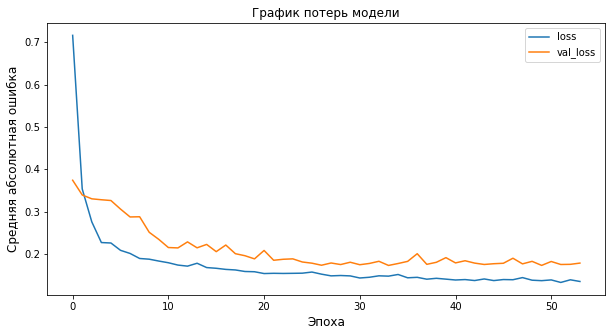

In [114]:
# Построение графика потерь модели
model_loss_plot(history_pr)

9/9 [==============================] - 0s 1ms/step


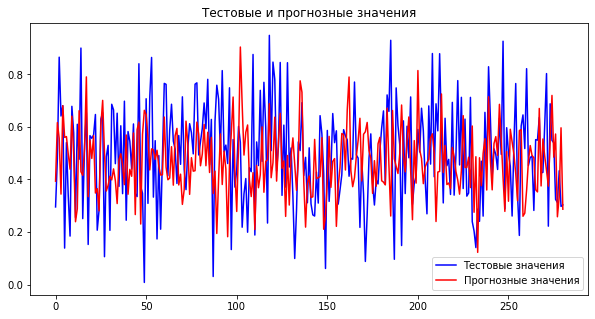

In [115]:
# Построение графика оригинального и прогнозного значения y
pred_pr = model_pr.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

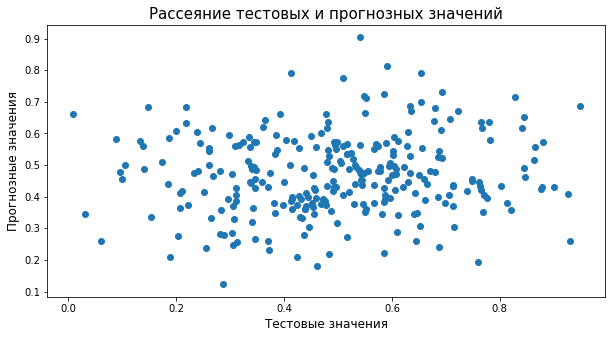

In [116]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_pr, predicted_pr)

In [117]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_pr.evaluate(X_test_pr, y_test_pr)}')

9/9 [==============================] - 0s 1ms/step - loss: 0.1721
Model MAE: 0.17209233343601227


In [118]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))}')

MAE среднего значения: Прочность при растяжении, МПа    0.152027
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


- Нейронная сеть для предсказания параметра Соотношение матрица-наполнитель

In [119]:
# Назначение переменных для создания модели
x_mn = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df[['Соотношение матрица-наполнитель']]
# Разбиение данных на обучающую и тестовую выборки
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=5)

In [120]:
# Получение данных в слой, который выполняет нормализацию входных объектов
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [121]:
# Вид модели - коллекция, стек слоев
model_mn = Sequential(X_train_mn_norm)
# Добавление слоев в модель
model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [122]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [123]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [124]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 0.8287 - val_loss: 0.1626
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3252 - val_loss: 0.1637
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2696 - val_loss: 0.1761
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2528 - val_loss: 0.1431
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2029 - val_loss: 0.1411
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2029 - val_loss: 0.1394
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1913 - val_loss: 0.1651
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1818 - val_loss: 0.1601
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1852 - val_loss: 0.1486
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 0.1793 - val_loss: 0.1457
Epoch 11/100
9/9 [==========

In [125]:
# Вывод архитектуры сети для mn
model_mn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 32)               

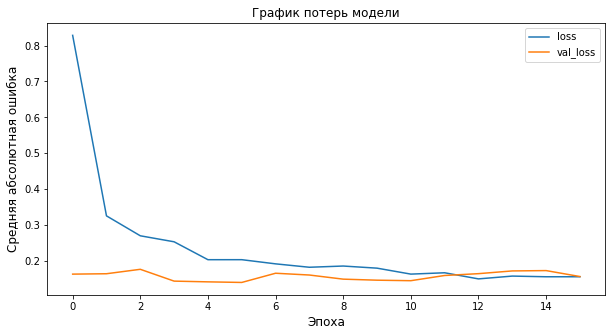

In [126]:
# Построение графика потерь модели
model_loss_plot(history_mn)

9/9 [==============================] - 0s 2ms/step


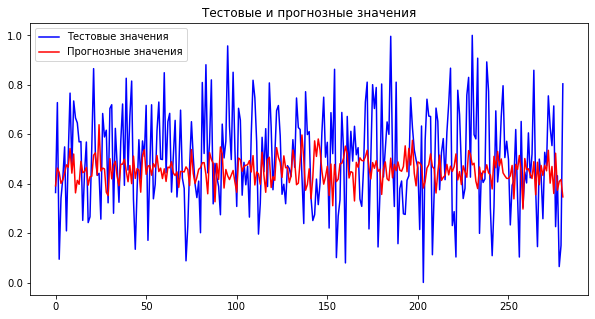

In [127]:
# Построение графика оригинального и прогнозного значения y
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

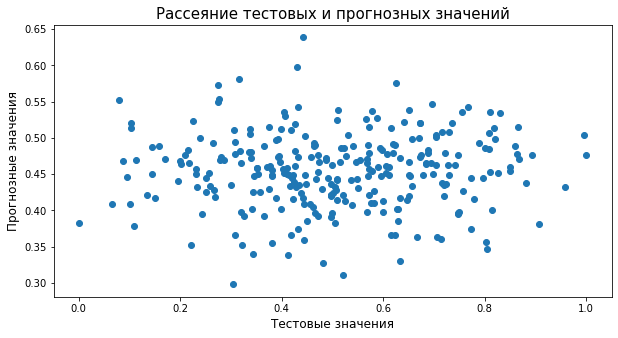

In [128]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_mn, predicted_mn)

In [129]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_mn.evaluate(X_test_mn, y_test_mn)}')

9/9 [==============================] - 0s 2ms/step - loss: 0.1718
Model MAE: 0.17184986174106598


In [130]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))}')

MAE среднего значения: Соотношение матрица-наполнитель    0.163008
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Вывод: средняя абсолютная ошибка модели прогноза y по рассматриваемым моделям примерно в тех же границах, что и при использовании других методов